# Introduction to image processing 

In [1]:
import imageio #один из самы распространённых способов для работы с изобр, сразу преобр в нужный формат

import numpy as np #изобр=матрица с пикселями
import matplotlib.pyplot as plt
from scipy import ndimage #numpy библ отсюда, тут станд ф-ц (фильтры ...)

%matplotlib inline

In [ ]:
# если хотим как-то выделять изображения без написания нейронки, работать с ними, основываясь на методах статистического анализа, как с пикселями/векторами
# обычно приводим изображение к датасету -> всячески его вращаем, отражаем от разных осей, применяем различные фильтрЫ ->
# начинаем обучение:) (алгоритма), далее это уже кастомизируется под фильтры, которые нам нужны

In [3]:
# OpenCV, SciKit-Image, Pillow - специализированные библиотеки для работы с картинками (более продвинутая работа с изобр)

shape:  (512, 512, 3)
type:  <class 'imageio.core.util.Array'>


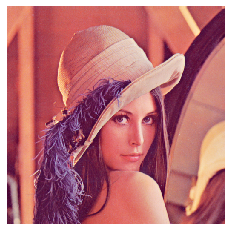

In [5]:
# https://en.wikipedia.org/wiki/Lenna -- стандатрное изображение для тестирования алгоритмов:)

img = imageio.imread("./Lenna.png") # plt.imread, PIL.Image.open и т.д. imwrite() - запись
print('shape: ', img.shape) # 512x512 пиксилей, 3 размерность - цвет
print('type: ', type(img))

plt.imshow(img) # RGB scale -- отображать так
plt.axis('off')
plt.show()

#это матрица типа imageo
#про размеры -- 3-мерн тензор

In [6]:
img # каждый пиксель расположен на цветовом кубе со сторонами - 255 (RGB scale)

Array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

In [9]:
np.array(img).min(), np.array(img).max(), np.array(img).mean()
#выведем цвет с мин, макс и ср кодом в изображении

(3, 255, 128.22837575276694)

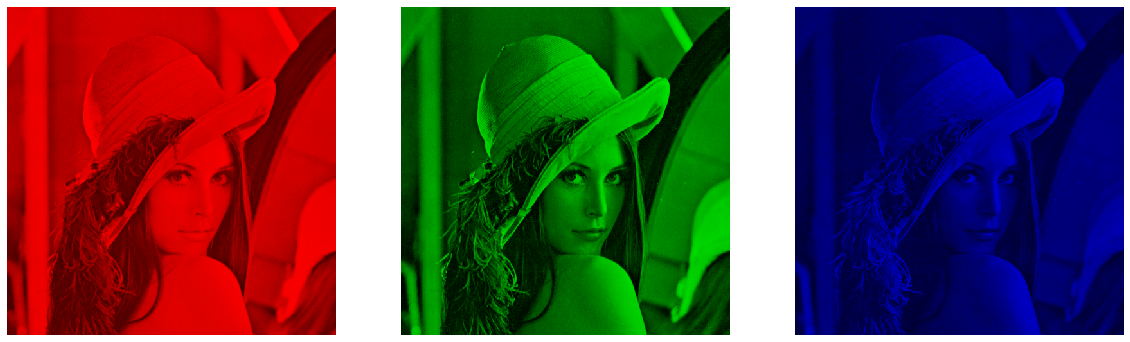

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

for c, ax in zip(range(3), axs): #бежим по 3-м измерениям и отрисовываем в каждом из них отдельно.В сумммеони дают наше изображение
    color_img = np.zeros_like(img)
    color_img[..., c] = img[..., c]
    ax.imshow(color_img)
    ax.set_axis_off()

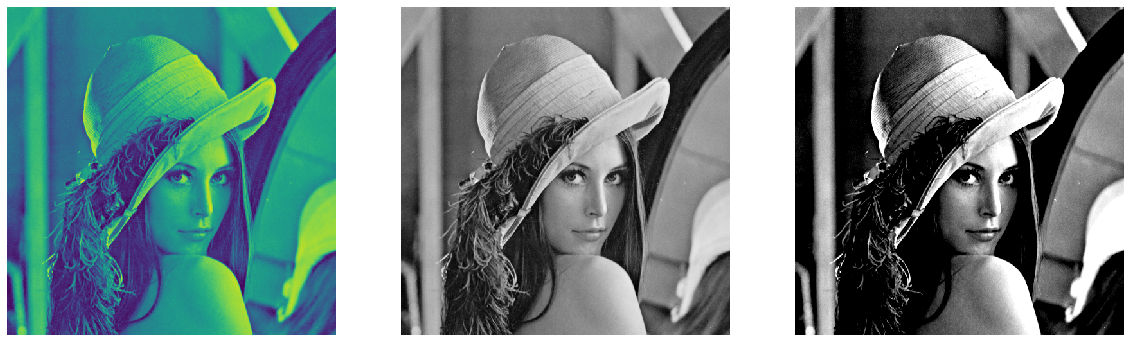

In [11]:
# grayscale = 0.2989 R + 0.5870 G + 0.1140 B - формула приведения к чб формату

img_gray = np.dot(img, [0.2989, 0.5870, 0.1140])#матрично умноженим, получим чб

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1) #зелёная история
plt.imshow(img_gray) 
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap=plt.cm.gray) #явно укажем, что наша иматрица подразумевалась чб
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_gray, cmap=plt.cm.gray, vmin=100, vmax=200) # + контрастность (указываем от какого до какого диапазона будем отрисовывать)
plt.axis('off')
plt.show()

#!! для нас image -- это матрица; это как куб со сторонами 255, можем делать с ним что хотим

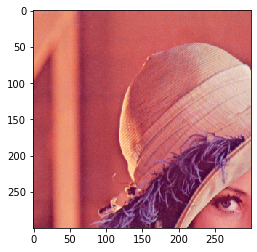

In [12]:
plt.imshow(img[:300, :300, :]) #отрисем часть матрицы (через slice)

In [20]:
img.min(), img.mean(), img.max()

(3, 128.22837575276694, 255)

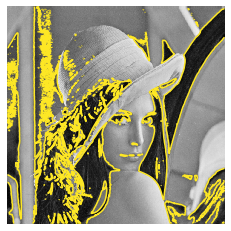

In [13]:
plt.imshow(img_gray,  cmap=plt.cm.gray)
plt.contour(img_gray, [0, 100]) # отрисовываем контуры (по градиенту), кухня matplotlib
plt.axis('off')
plt.show()

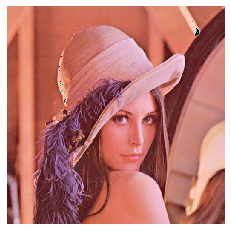

In [15]:
# https://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/
# вращение в пространстве цветов

#матрично вращаем 3-мерный тензор
from matplotlib.animation import FuncAnimation
from IPython import display
import warnings
warnings.filterwarnings("ignore")

def do_normalise(im): #ф-я нормальзации -- при вращении можем выйти за пределы цветовой гаммы
    return -np.log(1 / ((1 + im) / 257) - 1)
 
def undo_normalise(im): #обратноре нормирование
    return (1 + 1 / (np.exp(-im) + 1) * 257).astype("uint8")

def rotation_matrix(theta):
    """
    3D rotation matrix around the X-axis by angle theta
    """
    return np.c_[
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)], #це матрица поворота
        [0, np.sin(theta), np.cos(theta)]
    ]

for i in range(0, 100):
    im_normed = do_normalise(img)
    im_rotated = np.einsum("ijk,lk->ijl", im_normed, rotation_matrix(i * np.pi/10)) #итеративно вращаем на опр угол, чтобы менять цвет
    im2 = undo_normalise(im_rotated)
    
    plt.imshow(im2)
    plt.axis('off')
    plt.show()
    display.clear_output(wait=True)

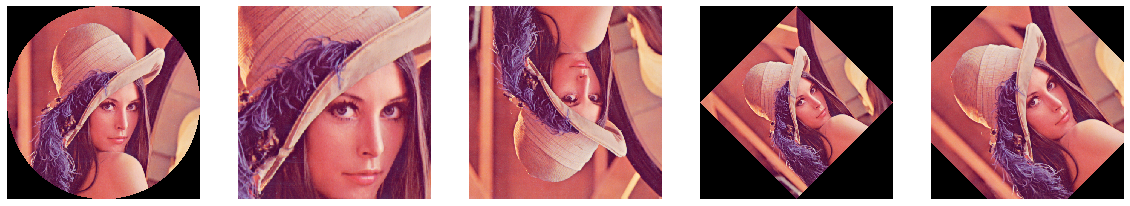

In [17]:
lx, ly, lz = img.shape

# Mask (рамочки)
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4 #уравение булевой маски
img_circle = img.copy()
img_circle[mask] = 0 # обычная маска в numpy //всё, что не лежит в круге задаём 0

# Cropping (приближение)
crop_img = img[lx // 4: - lx // 4, ly // 4: - ly // 4] # обычный slice в numpy (убираем по одной четвертис каждой оси)

# Flip (отображение)
flip_img = np.flipud(img) #зеркальное отобр отно-но гор оси

# Rotation (вращаем)
rotate_img = ndimage.rotate(img, 45) #повернули на 45 градусов
rotate_img_noreshape = ndimage.rotate(img, 45, reshape=False) #не меняем шейп -- размер остался

plt.figure(figsize=(20, 10))
plt.subplot(1, 5, 1)
plt.imshow(img_circle)
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(crop_img)
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(flip_img)
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(rotate_img)
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(rotate_img_noreshape)
plt.axis('off')

plt.show()

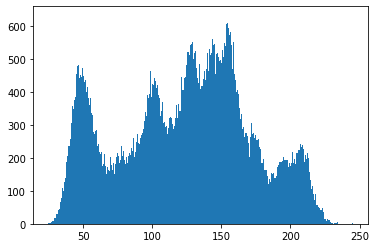

In [21]:
a = np.array(img_gray).ravel() #схлопнуть 3-мерный тензор до одномерного, массив чисел-интенсивностей
plt.hist(a, bins=1000) #гистограмма интенсивностей
plt.show()

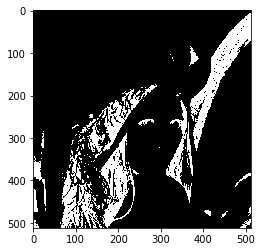

In [26]:
plt.figure(figsize=(20,10))
b = ((img_gray < 60) * 255).astype("uint8") #возьмём первую моду распределения, обязательно преобр в инт!чтобы нарисовать
plt.imshow(b, plt.cm.gray) #видим за что отвечает первая мода распределния (наиболее чёрное на нашей картинке - самое белое по интенсивности)

#можем с каждым цветом и их комбинацией строить их совместное расределение, выделять какие-лиюо модальности

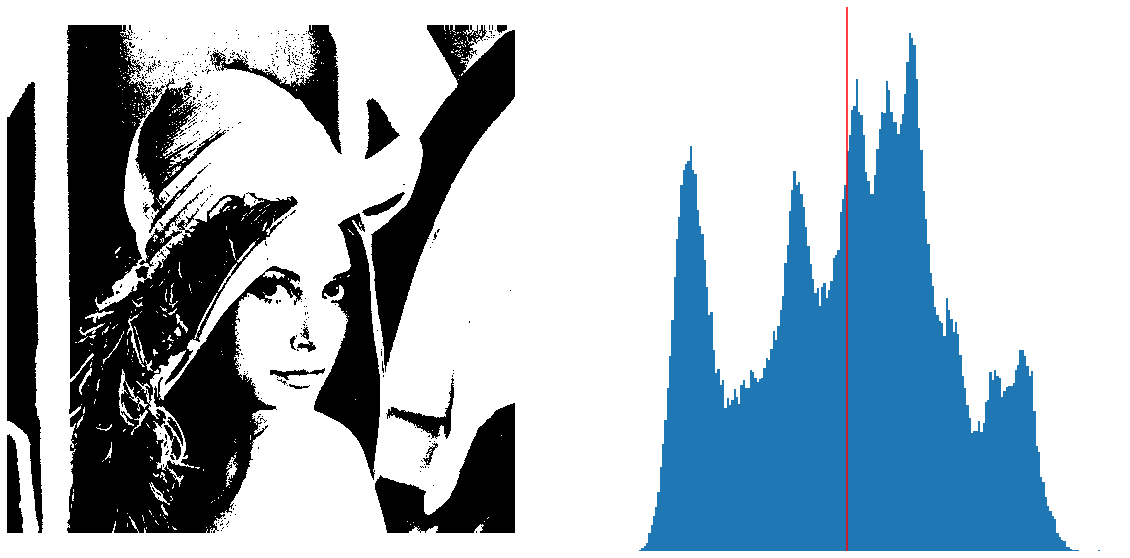

In [27]:
# сегментация изображения основанная на интенсивности цвета (статистический анализ: изменяем конкретные значение моды (см ячейку выше)
#(PS: сейчас это реализовывается через нейросети, там отдельно рассм кажд пиксель)

import time

for i in np.append(np.linspace(0, 2, 20), 1):
    plt.figure(figsize=(20,  10))
    plt.subplot(1, 2, 1)
    plt.imshow(((img_gray > i * img_gray.mean()) * 255).astype("uint8"), 
               cmap=plt.cm.gray) # пороговая сегментация
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.hist(np.array(img_gray).ravel(), bins=200)
    plt.axvline(x=i * img_gray.mean(), color='red')
    plt.axis('off')

    plt.show()
        
    display.clear_output(wait=True)
    time.sleep(0.5)
    
#демонстрация как идём по гистограмме и рассматриваем моды (как цвета добавляются), можно цветное/многомерное

In [28]:
from skimage import filters

val = filters.threshold_otsu(img_gray) # основан на гистограмме; 
#рассматривает изображение с одним цветом и бьёт егона 2 модальностям (находит положение на гистограмме, которео оптимально)
val

#PS: кластеры и сегментации с векторами -- что-то более сложное

116.45463203125

In [29]:
img_gray.mean() #недалеко ушли в значении val отн-но mean

124.02868437919616

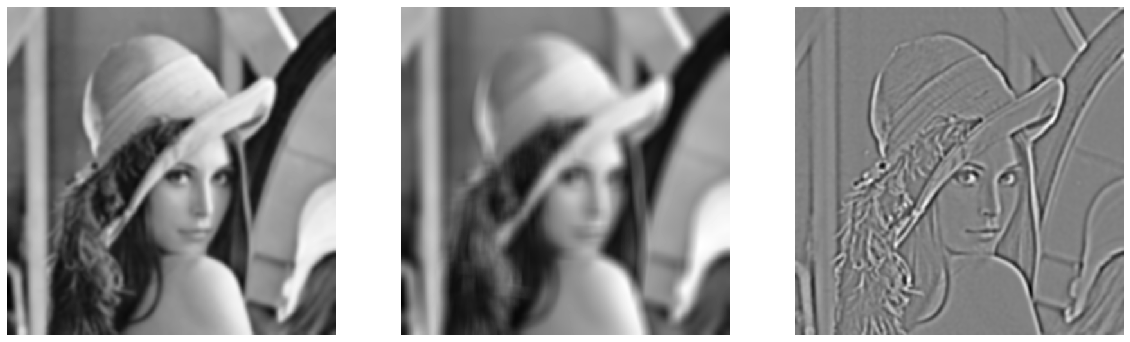

In [31]:
# фильтры - функция для значения цвета пикселя в зависимости от его окружения

gaussian_blurred = ndimage.gaussian_filter(img_gray, sigma=3) # размытие (гауссовское)
local_mean_blurred = ndimage.uniform_filter(img_gray, size=20) # тоже размытие (другое)

alpha = 1e10 # наведение резкости
filter_blurred = ndimage.gaussian_filter(gaussian_blurred, 1)
sharpened = gaussian_blurred + alpha * (gaussian_blurred - filter_blurred)  # придает больший вес контурам 

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(gaussian_blurred,  plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(local_mean_blurred,  plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened,  plt.cm.gray)
plt.axis('off')

plt.show()

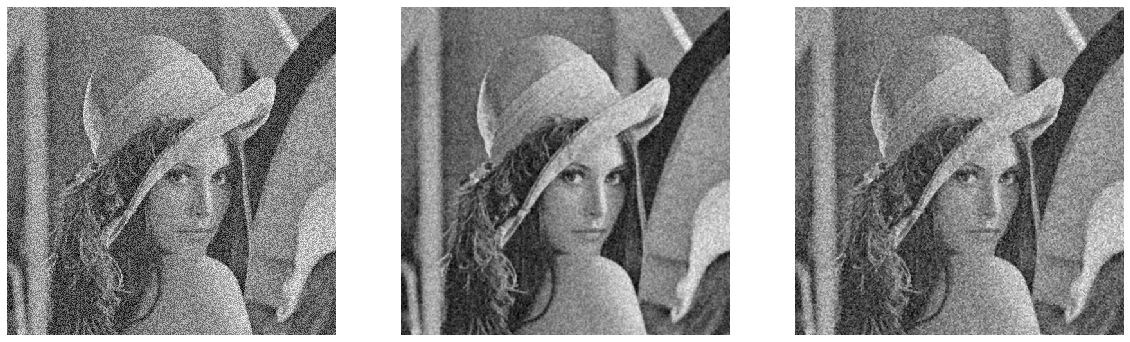

In [32]:
# денойзинг

noisy = img_gray + 3 * img_gray.std() * np.random.random(img_gray.shape) #прибавляем шум (к каждой точке добавили что-то случайное, но он более-менее равномерный)
#как избавиться от шума -- взять mean и вычесть его их пикселей
gauss_denoised = ndimage.gaussian_filter(noisy, 1) #применяем гаусовский фильтр
med_denoised = ndimage.median_filter(noisy, 3) # вроде как должно лучше с границами..
                                               # берём median
#PS: можно фильтр применить к фильтру -- в связках, и так сделать алг очитстки от шума
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(noisy,  plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gauss_denoised,  plt.cm.gray) #просто с размытием
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(med_denoised,  plt.cm.gray) #с вычитанием медианного значения из каждого пикселя
plt.axis('off')

plt.show()

In [ ]:
#контуры -- функции от окружения, где контрестность между пикселями

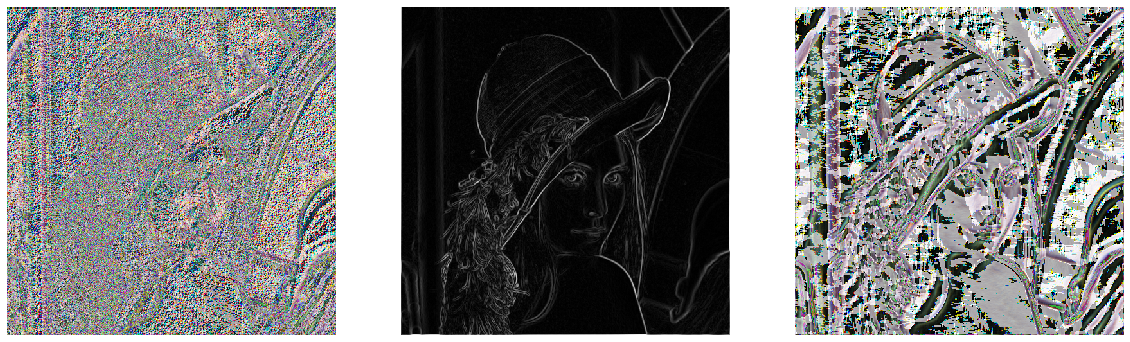

In [33]:
# edge detection 

def sobol_filter(img):     # фильтр Собель находит градиент по направлению по каждому цвету

    dx = ndimage.sobel(img, 0, mode='constant') #фильтр по направлению Ox
    dy = ndimage.sobel(img, 1, mode='constant') #фильтр по Oy
    sobel = np.hypot(dx, dy)  #берём корень из суммы квадратов по каждому из направления градиентов (такая функция) -- это общий градиент по всем направлениям через ф-ю длины
    sobel *= 255.0 / np.max(sobel)  #делаем нормировку (чтоб не выйти за пределы цветового куба)
    sobel = sobel.astype(img.dtype) #делаем нужный тип (интеджер)
    
    return sobel

sobel_img = sobol_filter(img) #1 картинка: непонятно, т.к. много цветов и в окружении цвета тоже много цветов, нет достаточных данных об окружении, данные путаются
sobel_gray = sobol_filter(img_gray) #2 картинка: для чб -> получилось достать очертания контура; можно быбыло для цветной сделать отдельные градиенты и сложить
med_img = ndimage.median_filter(img, 10) #сгладим медианным фильтром
sobel_median = sobol_filter(med_img) # комбинация фильтров: 3 картинка -- к сглаженному применяем соболь; силуэтов гораздо больше

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(sobel_img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_gray, plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_median, plt.cm.gray)
plt.axis('off')

plt.show()

#PS: можно взять пиксели, которые попадают в контуры Собеля, и как-то с ними работать 

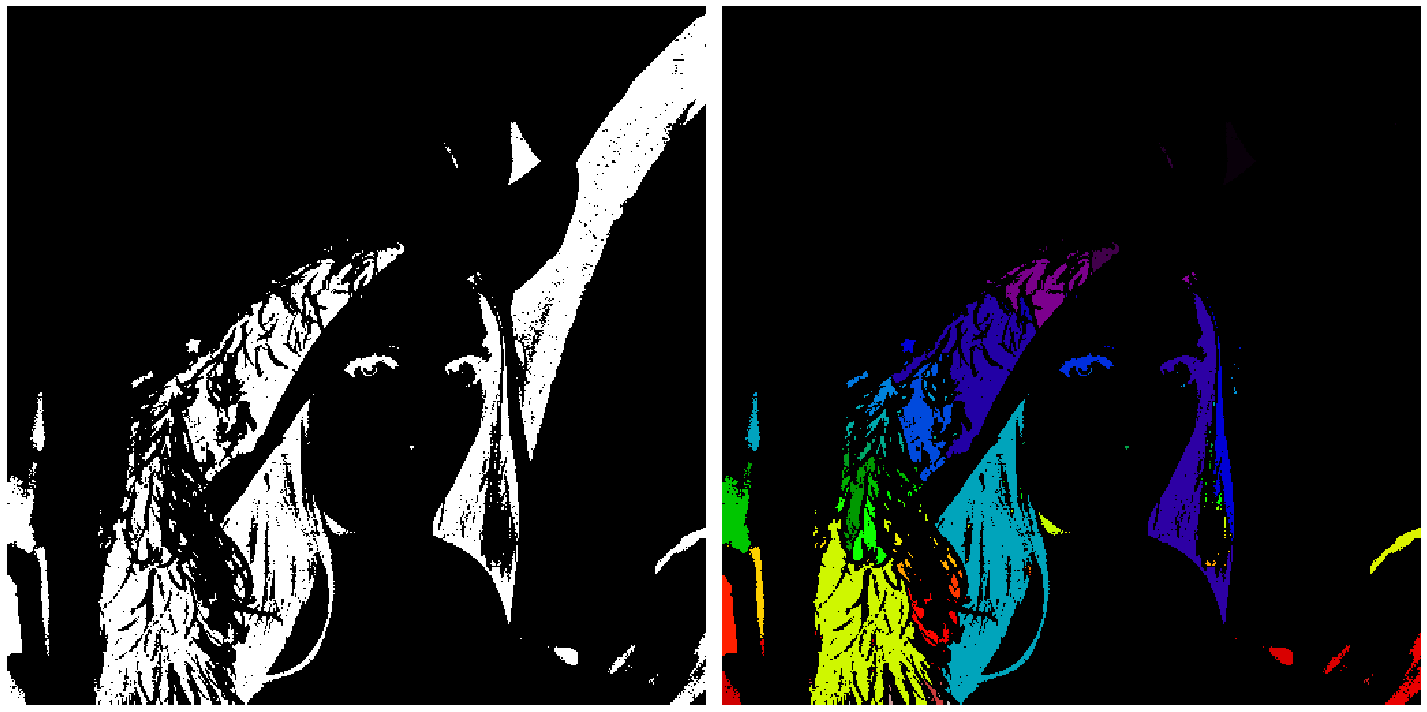

In [35]:
from skimage import measure

girl = img_gray < 0.5 * img_gray.mean() #возьмём пиксели, которые по моде лежат в первой половине (на гистограмме) и близки к среднему
labels = measure.label(girl, background=0) #находит меру схожести тех или иных пикселей, чтоюы понять как это сгруппировано-скласетризовано

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(girl, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(labels, cmap='nipy_spectral') #на рисунке побились на кластеры (см по цветам) по мнению алгоритма
plt.axis('off')

plt.tight_layout()
plt.show()

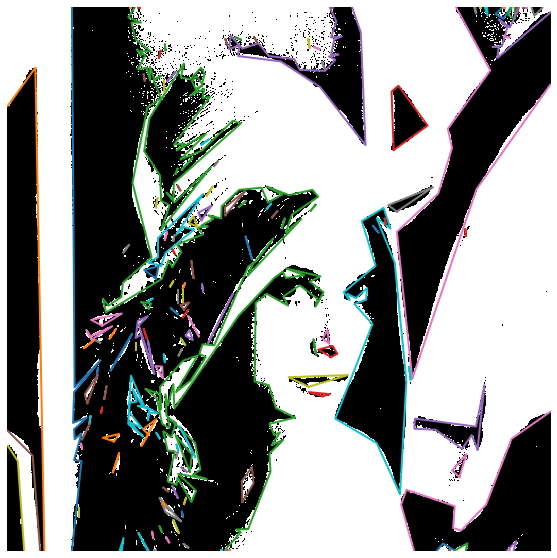

In [39]:
girl = img_gray > 1 * img_gray.mean() #пытаемся вручную найти границы!!!! (как в собеле)

#тут векторизуем изображение
contours = measure.find_contours(girl, 0.5, fully_connected="high") #превращаем в векторы
simplified_contours = [measure.approximate_polygon(c, tolerance=5) for c in contours] #параметр толерантности -- пиксели склеить в одно

plt.figure(figsize=(20, 10))
plt.imshow(girl, plt.cm.gray)
for n, contour in enumerate(simplified_contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
plt.axis('off')
plt.show()